<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         261 non-null    int64         
 1   Pickup point       261 non-null    object        
 2   Driver id          260 non-null    float64       
 3   Status             261 non-null    object        
 4   Request Date       261 non-null    datetime64[ns]
 5   Request Timestamp  261 non-null    object        
 6   Drop Date          261 non-null    object        
 7   Drop Timestamp     261 non-null    object        
 8   Time of Day        261 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 18.5+ KB
None
   Request id Pickup point  Driver id          Status Request Date  \
0           1         City        1.0  Trip Completed   2016-07-11   
1           3      Airport        2.0  Trip Completed   2016-07-

C:\Users\niket\AppData\Local\Temp\ipykernel_2212\2849039163.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['drop_datetime']=pd.to_datetime(df['Drop Date'].astype(str)+ ' ' +df['Drop Timestamp'].astype(str),errors='coerce')


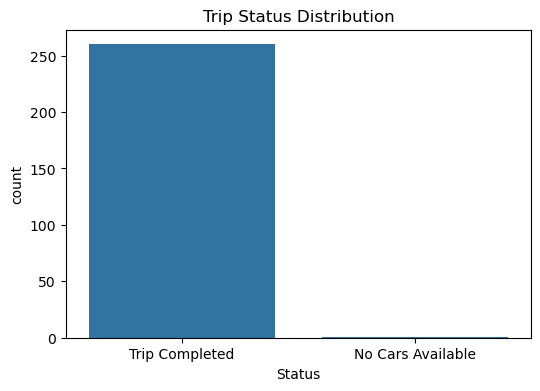

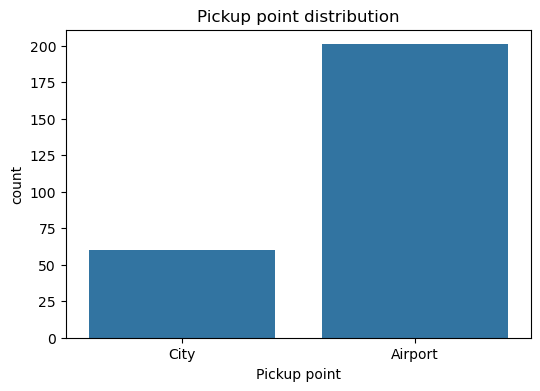

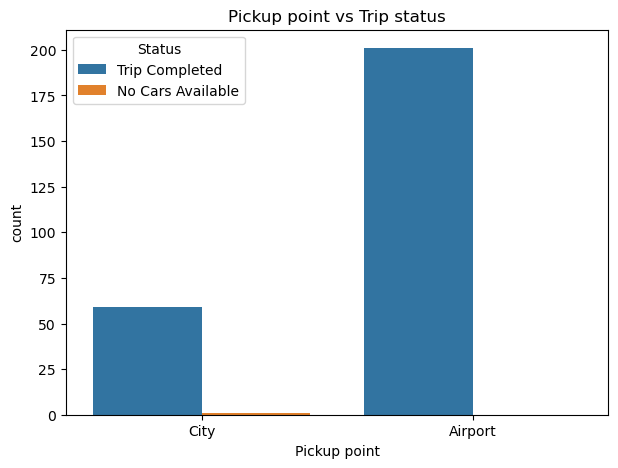

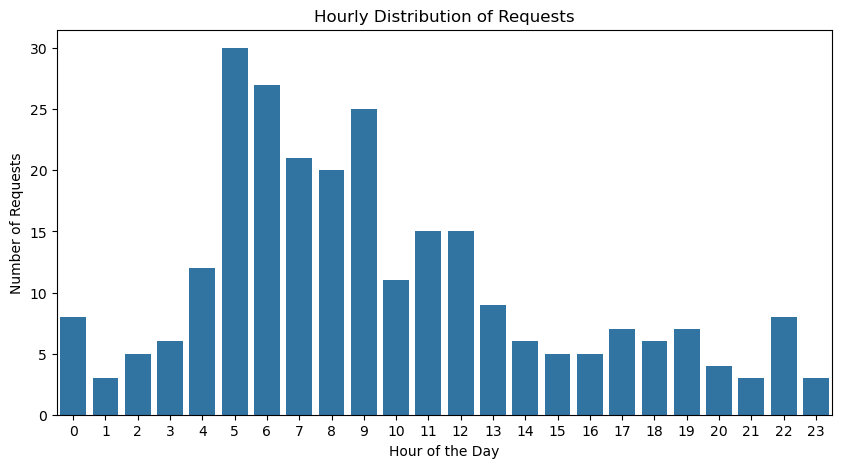

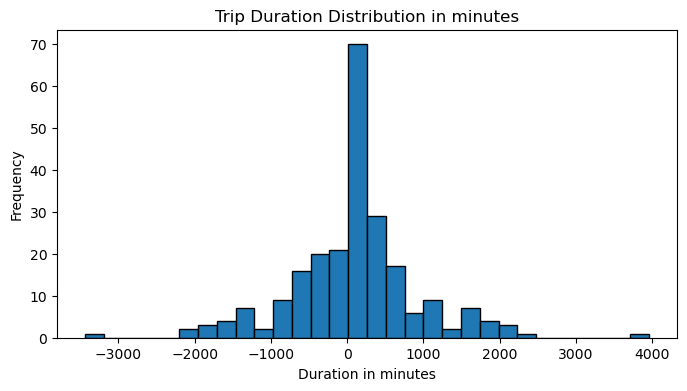

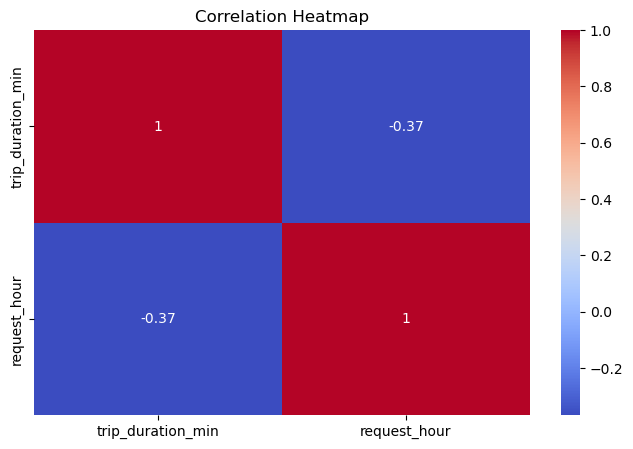

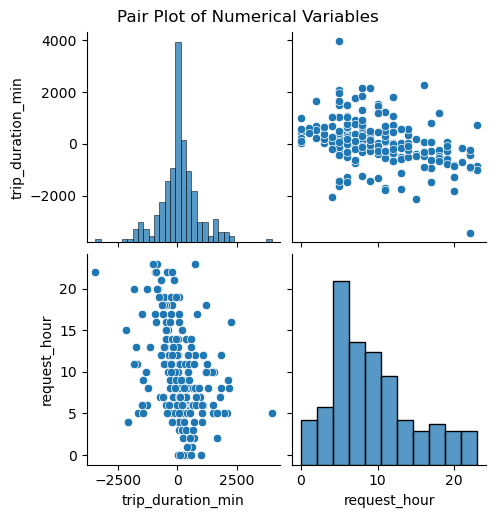


Requests Without Drivers (Likely 'No Cars Available'):

 Request id Pickup point            Status    request_datetime
       3957         City No Cars Available 2016-07-11 00:02:00

Trip Duration Summary (Only 'Trip Completed'):

Total Completed Trips: 260
Average Duration     : 87.00 mins
Min Duration         : -3434.00 mins
Max Duration         : 3955.00 mins
25th Percentile      : -279.25 mins
50th Percentile (Median): 62.50 mins
75th Percentile      : 431.00 mins


In [9]:
import os
os.chdir('C:/Users/niket/OneDrive/Desktop/Labmentix Intern')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel("Uber Request Data 2.xlsx") # Load the dataset from an Excel file
df.columns=df.columns.str.strip() # Clean column names by removing leading/trailing whitespace
print(df.info()) # Display basic information about the dataset (data types, non-null counts, etc.)
print(df.head()) # Show the first 5 rows of the dataset for a quick overview
# Combine 'Request Date' and 'Request Timestamp' into a single datetime column
df['request_datetime']=pd.to_datetime(df['Request Date'].astype(str)+ ' ' +df['Request Timestamp'].astype(str)) 
# Combine 'Drop Date' and 'Drop Timestamp' into a single datetime column, handling errors
df['drop_datetime']=pd.to_datetime(df['Drop Date'].astype(str)+ ' ' +df['Drop Timestamp'].astype(str),errors='coerce')
# Calculate trip duration in minutes by subtracting request time from drop time
df['trip_duration_min']=(df['drop_datetime']-df['request_datetime']).dt.total_seconds()/60
# Extract the hour from request_datetime for hourly analysis
df['request_hour']=df['request_datetime'].dt.hour
# Plot 1: Visualize the distribution of trip statuses
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Status',order=df['Status'].value_counts().index)
plt.title("Trip Status Distribution")
plt.show()
# Plot 2: Visualize the distribution of pickup points
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Pickup point')
plt.title("Pickup point distribution")
plt.show()
# Plot 3: Visualize pickup points segmented by trip status
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='Pickup point',hue='Status')
plt.title("Pickup point vs Trip status")
plt.show()
# Plot 4: Visualize the number of requests by hour of the day
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='request_hour')
plt.title("Hourly Distribution of Requests")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Requests")
plt.show()
# Plot 5: Visualize the distribution of trip durations for completed trips
plt.figure(figsize=(8, 4))
df[df['trip_duration_min'].notnull()]['trip_duration_min'].plot.hist(bins=30, edgecolor='black')
plt.title("Trip Duration Distribution in minutes")
plt.xlabel("Duration in minutes")
plt.show()
# Plot 6: Visualize the correlation heatmap for trip duration in min with request hour
plt.figure(figsize=(8, 5))
sns.heatmap(df[['trip_duration_min', 'request_hour']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
#Plot 7: Visualixe the pair plot for trip duration in min with request hour
sns.pairplot(df[['trip_duration_min', 'request_hour']].dropna())
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()
# Display requests with no driver assigned (likely 'No Cars Available')
print("\nRequests Without Drivers (Likely 'No Cars Available'):\n")
missing_drivers = df[df['Driver id'].isnull()][['Request id', 'Pickup point', 'Status', 'request_datetime']]
print(missing_drivers.to_string(index=False))

# Summarize trip duration statistics for completed trips only
print("\nTrip Duration Summary (Only 'Trip Completed'):\n")
completed_trips = df[df['Status'] == 'Trip Completed']
duration_stats = completed_trips['trip_duration_min'].describe()
# Print key statistics for trip durations
print(f"Total Completed Trips: {len(completed_trips)}")
print(f"Average Duration     : {duration_stats['mean']:.2f} mins")
print(f"Min Duration         : {duration_stats['min']:.2f} mins")
print(f"Max Duration         : {duration_stats['max']:.2f} mins")
print(f"25th Percentile      : {duration_stats['25%']:.2f} mins")
print(f"50th Percentile (Median): {duration_stats['50%']:.2f} mins")
print(f"75th Percentile      : {duration_stats['75%']:.2f} mins")


